In [1]:
!pip install mlxtend==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#read data
with open('/work/wdbc.pkl', 'rb') as f:
    wdbc = pickle.load(f)
wdbc

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df = wdbc.drop(["id"], axis=1)
df

,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0    357
1    212
Name: malignant, dtype: int64


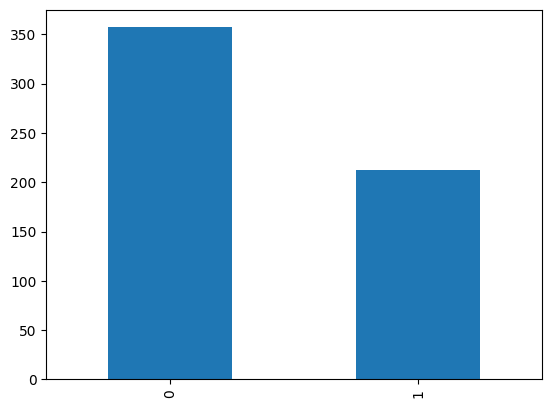

In [5]:
val_counts = df['malignant'].value_counts().plot.bar()
mali_counts = df['malignant'].value_counts()
print(mali_counts)

In [6]:
df_0 = df.iloc[:,0:11]
df_mali = df['malignant']
df_1 = df.iloc[:,11:21]
df_2 = df.iloc[:,21:31]

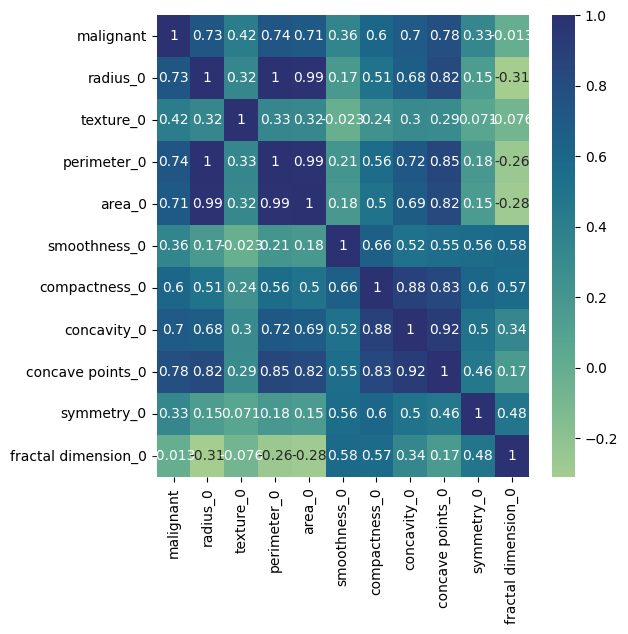

In [7]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(df_0.corr(),annot=True,cmap="crest")

In [8]:
#size
area_mean = df_0['radius_0'].mean()
peri_mean = df_0['perimeter_0'].mean()
radi_mean = df_0['radius_0'].mean()

In [10]:
#shape
compact_mean = df_0['compactness_0'].mean()
smooth_mean = df_0['smoothness_0'].mean()

In [11]:
#structure
texture_mean = df_0['texture_0'].mean()
concavity_mean = df_0['concavity_0'].mean()
concapoint_mean = df_0['concave points_0'].mean()

In [12]:
#homogeneity
var_mean = df_1.mean()
var_mean

radius_1                0.405172
texture_1               1.216853
perimeter_1             2.866059
area_1                 40.337079
smoothness_1            0.007041
compactness_1           0.025478
concavity_1             0.031894
concave points_1        0.011796
symmetry_1              0.020542
fractal dimension_1     0.003795
dtype: float64

In [13]:
#If [cell size is abnormal]:
#or [cell shape is abnormal]
#or [cell texture is abnormal]
#or [cell homogeneity is abnormal], 
#then: diagnosis is malignant, 
#otherwise: diagnosis is benign.

malignant=[]
benign=[]



def rule_based_classifier(idx, row):
    if row['area_0'] > area_mean and row['perimeter_0'] > peri_mean and row['radius_0'] > radi_mean:
        malignant.append(row['id'])
    elif row['compactness_0'] > compact_mean and row['smoothness_0'] > smooth_mean:
        malignant.append(row['id'])
    elif row['texture_0'] > texture_mean and row['concavity_0'] > concavity_mean and row['concave points_0'] > concapoint_mean:
        malignant.append(row['id'])
    else:
        benign.append(row['id'])

for index, row in wdbc.iterrows():
    rule_based_classifier(index,row)
malignant

[842302.0,
 842517.0,
 84300903.0,
 84348301.0,
 84358402.0,
 843786.0,
 844359.0,
 84458202.0,
 844981.0,
 84501001.0,
 845636.0,
 84610002.0,
 846226.0,
 846381.0,
 84667401.0,
 84799002.0,
 848406.0,
 84862001.0,
 849014.0,
 8510653.0,
 8511133.0,
 851509.0,
 852552.0,
 852631.0,
 852763.0,
 852781.0,
 852973.0,
 853201.0,
 853401.0,
 853612.0,
 85382601.0,
 854002.0,
 854039.0,
 854253.0,
 854268.0,
 855133.0,
 855138.0,
 855563.0,
 855625.0,
 856106.0,
 85638502.0,
 857010.0,
 85715.0,
 857392.0,
 857438.0,
 857637.0,
 857793.0,
 858986.0,
 85922302.0,
 859283.0,
 859471.0,
 859575.0,
 859711.0,
 859717.0,
 859983.0,
 8610404.0,
 8610629.0,
 8610637.0,
 8610862.0,
 8611161.0,
 8611555.0,
 8611792.0,
 8612399.0,
 86135501.0,
 86135502.0,
 861598.0,
 861648.0,
 861799.0,
 862028.0,
 86208.0,
 862548.0,
 863030.0,
 86355.0,
 86408.0,
 86409.0,
 864292.0,
 864729.0,
 864877.0,
 865128.0,
 86517.0,
 865423.0,
 865432.0,
 866203.0,
 866458.0,
 866674.0,
 8670.0,
 86730502.0,
 867387.0,


True Positive is: 206 False Positive is: 89 True Negtive is: 268 False Negative is: 6


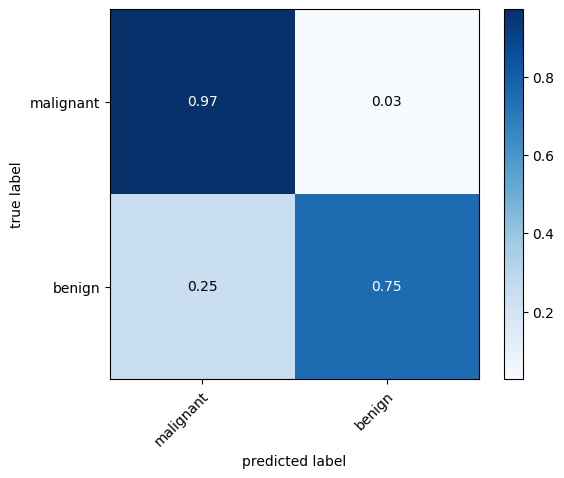

The specificity of rule based classifier is 0.7507002801120448
The sensitivity of rule based classifier is 0.9716981132075472


In [14]:
#rule-based-classifier evaluate
TP = 0
FP = 0
FN = 0
TN = 0
for index, row in wdbc.iterrows():
    for j in malignant:
        if row['id'] == j and row['malignant'] == 1:
            TP += 1
        elif row['id'] == j and row['malignant'] == 0:
            FP += 1
    for j in benign:
        if row['id'] == j and row['malignant'] == 0:
            TN += 1
        if row['id'] == j and row['malignant'] == 1:
            FN += 1

print('True Positive is:',TP, 'False Positive is:',FP, 'True Negtive is:',TN, 'False Negative is:',FN)
cm = np.array([[206, 6],
               [89, 268]])

classes = ['malignant', 'benign']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

specificity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
print('The specificity of rule based classifier is', specificity)
print('The sensitivity of rule based classifier is', sensitivity)

In [15]:
#random forest
x = df.drop(['malignant'], axis=1)
y = df['malignant']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [17]:
y_pred = rfc.predict(x_test)

In [18]:
acc_score = accuracy_score(y_test,y_pred)
print('The accuracy score of random forest is',acc_score)

The accuracy score of random forest is 0.9649122807017544


In [19]:
#own designed classifier
#prepare data
#size_data = df[["malignant","radius_0","radius_1","radius_2","perimeter_0","perimeter_1","perimeter_2","area_0","area_1","area_2"]]
#shape_data = df[["malignant","smoothness_0","smoothness_1","smoothness_2","compactness_0","compactness_1","compactness_2"]]
#structure_data = df[["malignant","texture_0","texture_1","texture_2","concavity_0","concavity_1","concavity_2","concave points_0","concave points_1","concave points_2"]]
size_data = df[["malignant","radius_0","perimeter_0","area_0"]]
shape_data = df[["malignant","smoothness_0","compactness_0"]]
structure_data = df[["malignant","texture_0","concavity_0","concave points_0"]]

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

def gaussian_classifier(data,test_point):
    x = data.drop(["malignant"], axis=1)
    y = data["malignant"]
    x_size_train,x_size_test,y_size_train,y_size_test = train_test_split(x, y, test_size=0.2, random_state=42)
    gnb_clf = GaussianNB()
    gnb_clf.fit(x_size_train,y_size_train)
    y_size_pred = gnb_clf.predict(test_point)
    prob = gnb_clf.predict_proba(test_point)
    return y_size_pred,prob
    #if y_size_pred == 1:
        #prob = gnb_clf.predict_proba(test_point)
        #return "Patient is malignant with probability of",prob

In [21]:
#test_temp = np.array([[20,89,14]])
#test_temp=test_temp.reshape(-1,1)
#size_classifier(size_data,test_temp)
def interpretable_classifier(size_data,shape_data,structure_data,test_point_size,test_point_shape,test_point_struct):
    size_gcl,size_prob = gaussian_classifier(size_data, test_point_size)
    shape_gcl,shape_prob = gaussian_classifier(shape_data, test_point_shape)
    structure_gcl,struct_prob = gaussian_classifier(structure_data, test_point_struct)
    if size_gcl == 1:
        #size_prob = size_gcl.predict_proba(test_point_size)
        return "Cell size is abnormal, patient is malignant with probability of",size_prob
    elif shape_gcl == 1:
        #shape_prob = shape_gcl.predict_proba(test_point_shape)
        return "Cell shape is abnormal, patient is malignant with probability of",shape_prob
    elif structure_gcl == 1:
        #structure_prob = structure_gcl.predict_proba(test_point_struct)
        return "Cell structure is abnormal, patient is malignant with probability of",structure_prob
    

In [22]:
#real data test
test_size = np.array([[21, 136, 1297]])
test_shape = np.array([[0.1003, 0.1328]])
test_struct = np.array([[15, 0.198, 0.1043]])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [23]:
interpretable_classifier(size_data,shape_data,structure_data,test_size,test_shape,test_struct)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/bas

('Cell size is abnormal, patient is malignant with probability of',
 array([[3.56609982e-17, 1.00000000e+00]]))

In [37]:
#shape abnormal test
test_size_2 = np.array([[13.54, 87.46, 566.3]])
test_shape_2 = np.array([[0.2, 0.3]]) #here
test_struct_2 = np.array([[14.36, 0.066, 0.0478]])

In [38]:
interpretable_classifier(size_data,shape_data,structure_data,test_size_2,test_shape_2,test_struct_2)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/bas

('Cell shape is abnormal, patient is malignant with probability of',
 array([[4.32705371e-09, 9.99999996e-01]]))

In [36]:
df

,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3701b99-8098-40f2-b242-3851a87ef149' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>